In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 22s 11us/step


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)


def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [13]:
%%time

split_value = 1000

x_val = x_train[:split_value]
partial_x_train = x_train[split_value:]
y_val = one_hot_train_labels[:split_value]
partial_y_train = one_hot_train_labels[split_value:]

history = model.fit(partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
    )



Epoch 1/80
499/499 [==============================] - 1s 2ms/step - loss: 0.1441 - accuracy: 0.9562 - val_loss: 1.3399 - val_accuracy: 0.7840
Epoch 2/80
499/499 [==============================] - 1s 1ms/step - loss: 0.1424 - accuracy: 0.9565 - val_loss: 1.4365 - val_accuracy: 0.7860
Epoch 3/80
499/499 [==============================] - 1s 1ms/step - loss: 0.1378 - accuracy: 0.9592 - val_loss: 1.5234 - val_accuracy: 0.7800
Epoch 4/80
499/499 [==============================] - 1s 1ms/step - loss: 0.1378 - accuracy: 0.9597 - val_loss: 1.4696 - val_accuracy: 0.7820
Epoch 5/80
499/499 [==============================] - 1s 1ms/step - loss: 0.1342 - accuracy: 0.9578 - val_loss: 1.6269 - val_accuracy: 0.7850
Epoch 6/80
499/499 [==============================] - 1s 1ms/step - loss: 0.1375 - accuracy: 0.9578 - val_loss: 1.5444 - val_accuracy: 0.7890
Epoch 7/80
499/499 [==============================] - 1s 1ms/step - loss: 0.1355 - accuracy: 0.9568 - val_loss: 1.6546 - val_accuracy: 0.7890
Epoch 

In [5]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 490us/step - loss: 1.0447 - accuracy: 0.7707
[1.0447083711624146, 0.7707034945487976]


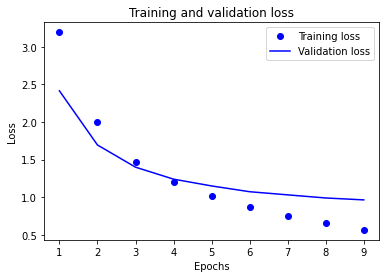

In [6]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

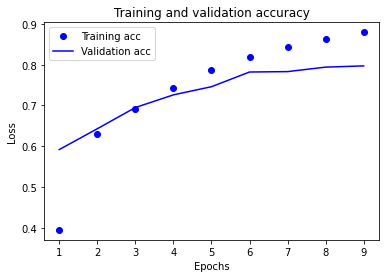

In [7]:
plt.clf()
# clear figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
predictions = model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])

3